# Image classification Tensorflow using CNNs

In [239]:
import tensorflow as tf
import zipfile
from pathlib import Path
from PIL import Image
import numpy as np

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [240]:
trainSet = Path(r"E:\Datasets\CatsVsDogs\TrainingSet")
testSet = Path(r"E:\Datasets\CatsVsDogs\TestSet")

Printing a sample image of a cat

In [241]:
catsDir = trainSet / "cats"
dogsDir = trainSet / "dogs"

In [242]:
imgPathCat = random.choice(list(catsDir.glob("*.*")))
imgPathDog = random.choice(list(dogsDir.glob("*.*")))

In [243]:
imgCat = Image.open(imgPathCat)
imgDog = Image.open(imgPathDog)

In [244]:
imgCat = imgCat.convert("RGB")
imgDog = imgDog.convert("RGB")

In [245]:
imgNPCat = np.asarray(imgCat)
imgNPDog = np.asarray(imgDog)

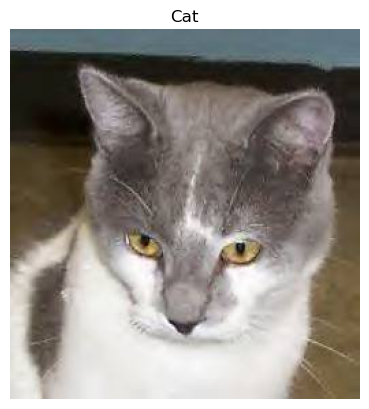

In [246]:
plt.imshow(np.asarray(imgNPCat))
plt.axis("off")
plt.title("Cat")
plt.show()

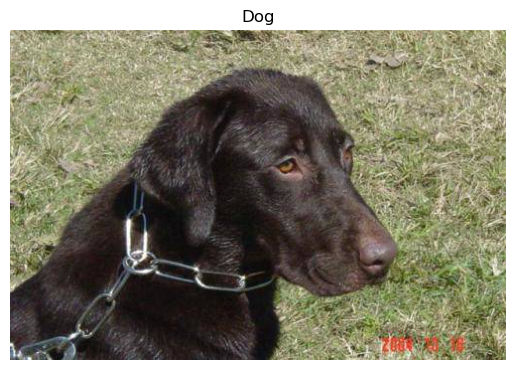

In [247]:
plt.imshow(np.asarray(imgNPDog))
plt.axis("off")
plt.title("Dog")
plt.show()